# Intuition of ODE Solvers


Ordinary Differential Equations (ODEs) are equations that involve derivatives of an unknown function. They describe a system's dynamic behavior. 

Numerical solvers for ODEs work by approximating the continuous behavior of the system using discrete steps. The most basic of these is the [Euler method](https://en.wikipedia.org/wiki/Euler_method).

We'll write an ODE solver from scratch, using Euler's method. This will give you a good understanding of the basic principles in solving ODEs numerically.

Let's start by defining a simple ODE, the [Exponential decay](https://en.wikipedia.org/wiki/Exponential_decay) function.

$$
\frac{{dy}}{{dt}} = -k \cdot y
$$

where $k$ is a constant, $y$ is the function we want to find, and $t$ is time.

Let's define this equation in Python.


In [1]:
import numpy as np

def exp_decay_dt(y, t, k=1):
    return -k * y

For this differential equation, there is an exact solution. Note that in most cases there is no exact solution, and we rely on numerical methods.

$$
y(t) = y_0 e^{-k t}
$$

We will use this to compare our numerical solution to.

In [2]:
def exp_decay(y0, t, k=1):
    return y0 * np.exp(-k * t)

Now, let's define the Euler method for solving ODEs. The Euler method works by taking small time steps and approximating the change at each step as follows:

$$
y(t + \Delta t) = y(t) + \frac{{dy}}{{dt}} \cdot \Delta t
$$

where $ \Delta t $ is the time step size. The smaller the more accurate, but the longer it takes to compute.

In [3]:
import numpy as np

def solve_ode_euler(dydt, y0, Dt=0.1, t_end=10):
    # Calculate the number of steps
    n_steps = int(t_end / Dt)
    
    # Create an array of time points at which to evaluate the solution
    t_values = np.linspace(0, t_end, n_steps + 1)
    
    # Initialize arrays to store the time points and the solution
    y_values = np.zeros(n_steps + 1)
    
    # Set the initial condition
    y_values[0] = y0
    
    # Solve the ODE using the Euler method
    for i in range(n_steps):
        y_values[i+1] = y_values[i] + dydt(y_values[i], t_values[i]) * Dt
        
    return t_values, y_values

Let's plot the solution for various values of $\Delta t$ to understand the effect of the time step size.

In [4]:
import matplotlib.pyplot as plt
from ipywidgets import interact


def solve_and_plot(Dt):
    y0 = 10
    t_values, y_values = solve_ode_euler(dydt=exp_decay_dt, y0=y0, Dt=Dt, t_end=10)
    y_true = exp_decay(y0=y0, t=t_values)
    plt.plot(t_values, y_values, marker='o')
    plt.plot(t_values, y_true)

interact(solve_and_plot, Dt=(0.0, 2.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='Dt', max=2.0), Output()), _dom_classes=('widget-inte…

The Euler method is not a good fit for systems that change rapidly. In these cases we would use more advanced methods, e.g., [Runge–Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

Fortunately for us we will not have to deal with solver selection. We will be using [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), which uses advanced methods to solve systems of ODEs, wihout us having to worry about the details.

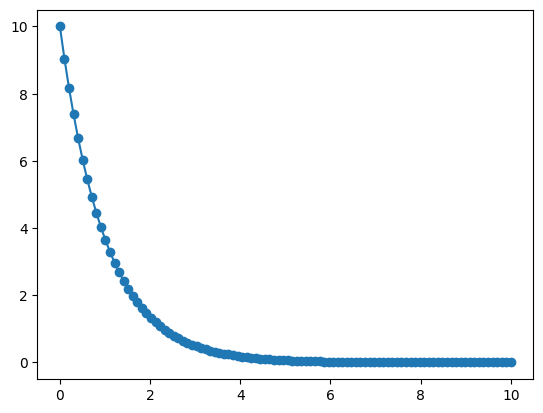

In [5]:
from scipy.integrate import odeint

t = np.linspace(0, 10, 100)
y = odeint(exp_decay_dt, 10, t)

plt.plot(t, y, marker='o');